/home/kering/Desktop/MachineLearningProjects/KnowledgeBasedSystemsML/KnowledgeBasedSystemsVenv/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


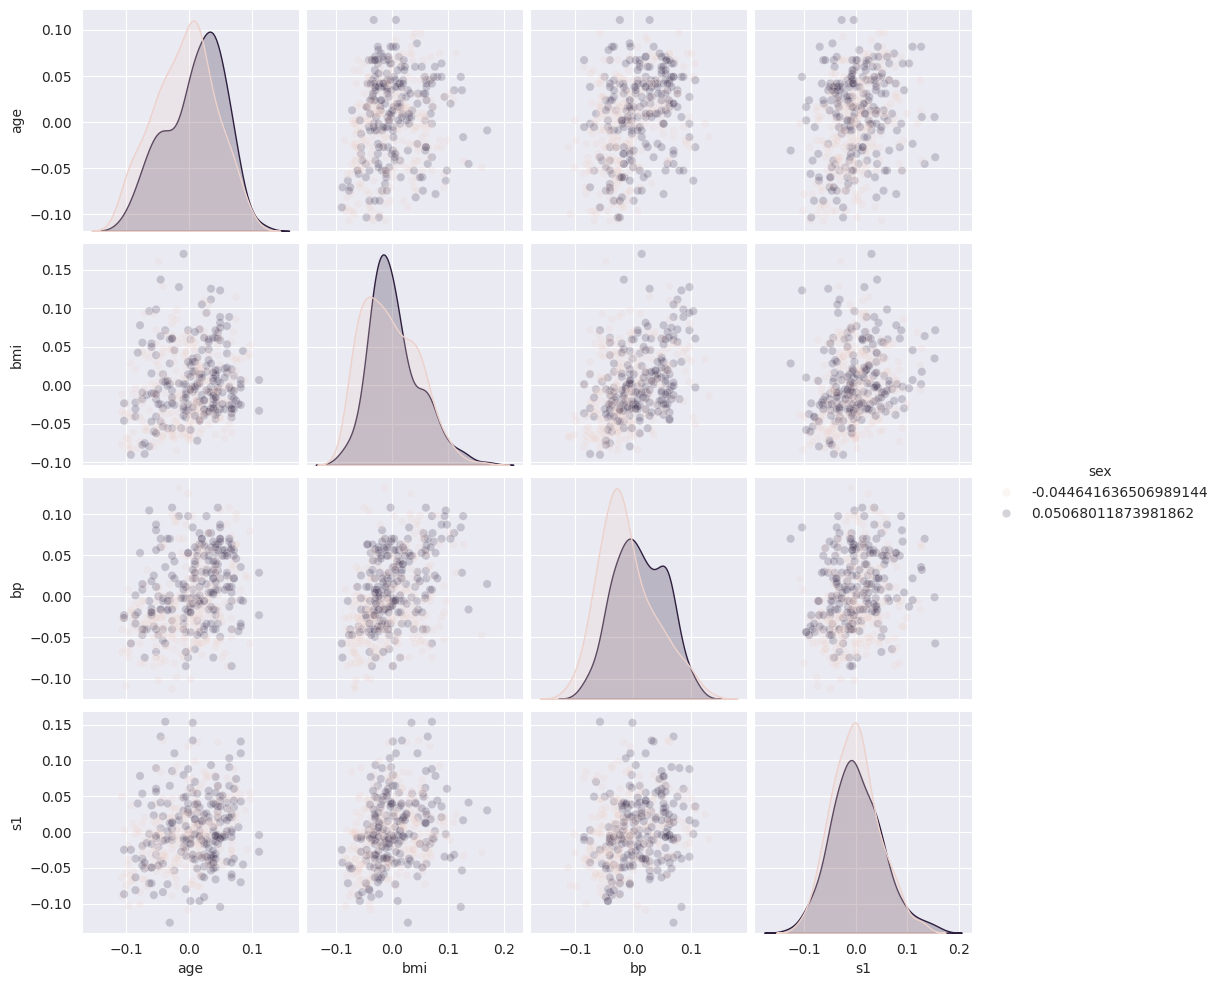

In [28]:
from sklearn import  datasets
import pandas as  pd
from sklearn.model_selection import  train_test_split
import  seaborn as sns 

diabetes = datasets.load_diabetes()

diabetes_df = pd.DataFrame(diabetes.data,
                           columns=diabetes.feature_names
                           )

diabetes_df['target'] = diabetes.target

Y_Data = diabetes_df.target
X_Data= diabetes_df.drop(
    ["target"], axis=1
)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_Data,
    Y_Data,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

sns.pairplot(
    diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']],
    size=2.5, 
    hue='sex',
    plot_kws={'alpha':.2},
)



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


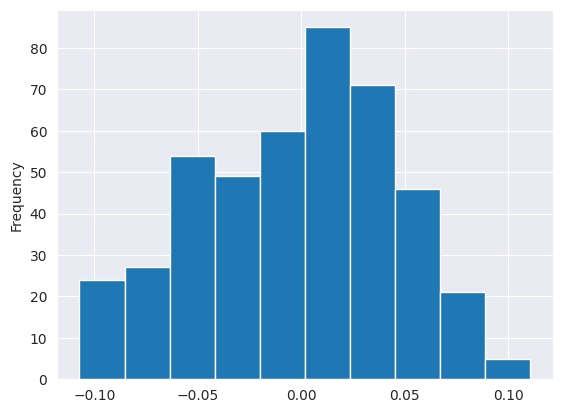

In [36]:
import matplotlib.pyplot as plt 
import  numpy as np 
series_to_plot = diabetes_df['age']

# Create a histogram
series_to_plot.plot(kind='hist', bins= 10)

diabetes_df


In [49]:
distances = np.array([2.0, 4.0, 4.0])   #The idea here is that when distances are small, closeness is high (close proximity)

closeness = 1.0 / distances # element-by-element division
weights = closeness / np.sum(closeness)# normalize sum to one
print(weights) 




[0.5  0.25 0.25]


In [50]:
values = np.array([4, 6, 8])
mean = np.mean(values)
wgt_mean = np.dot(values, weights)
print("Mean:", mean)
print("Weighted Mean:", wgt_mean)

Mean: 6.0
Weighted Mean: 5.5


1.0
2.0
3.0
3.5
4.0
5.0


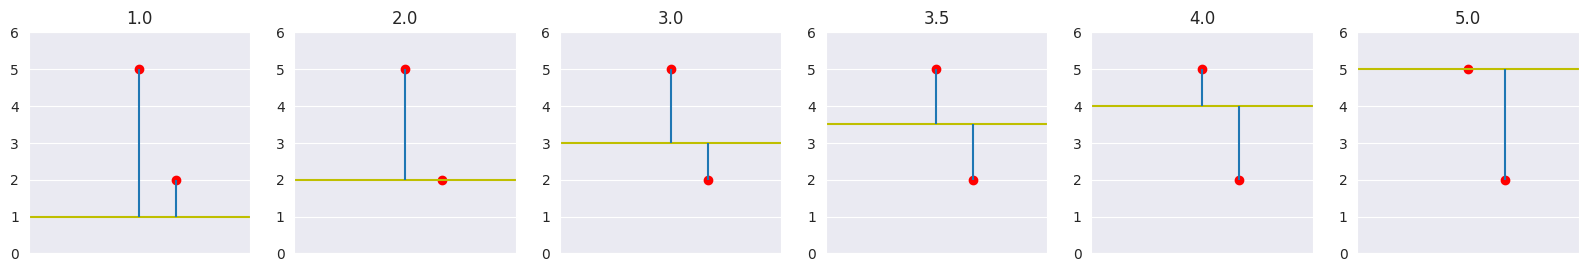

In [118]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import  KNeighborsRegressor

from sklearn import  datasets
tts = train_test_split(diabetes.data,
diabetes.target,
test_size=.25)
(diabetes_train_ftrs, diabetes_test_ftrs,
diabetes_train_tgt,
diabetes_test_tgt) = tts


knn= KNeighborsRegressor(n_neighbors=3)
fit= knn.fit(diabetes_train_ftrs, diabetes_train_tgt)

preds = fit.predict(diabetes_test_ftrs)

result = mean_squared_error(diabetes_test_tgt, preds)

def axis_helper(ax, lims):
    ax.set_xlim(lims)
    ax.set_xticks([])
    ax.set_ylim(lims); 
    ax.set_aspect('equal')
    
    
# our data is very simple:two (x, y) points

D = np.array([[3, 5],
[4, 2]])
# we'll take x as our "input" and y as our "output"
x, y = D[:, 0], D[:, 1]


horizontal_lines = np.array([1, 2, 3, 3.5, 4, 5])
results = []
fig, axes = plt.subplots(1, 6, figsize=(20,7))
for h_line, ax in zip(horizontal_lines, axes.flat):
    print(h_line)
    axis_helper(ax, (0, 6))
    ax.set_title(str(h_line))
    # plot the data
    ax.plot(x, y, 'ro')
    # plot the prediction line
    ax.axhline(h_line, color='y') # ax coords; defaults to 100%
    # plot the errors
    # the horizontal line *is* our prediction; renaming for clarity
    predictions = h_line
    ax.vlines(x, predictions, y)
    # calculate the error amounts and their sum of squares
    errors = y - predictions
    sse = np.dot(errors, errors)
    # put together some results in a tuple
    results.append((predictions,
    errors, errors.sum(),
    sse, np.sqrt(sse)))






In [116]:
col_labels = "Prediction", "Errors", "Sum", "SSE", "Distance"
display(pd.DataFrame.from_records(results,
columns=col_labels,
index="Prediction"))

,Errors,Sum,SSE,Distance
Prediction,,,,
1.0,"[4.0, 1.0]",5.0,17.0,4.123106
2.0,"[3.0, 0.0]",3.0,9.0,3.000000
3.0,"[2.0, -1.0]",1.0,5.0,2.236068
3.5,"[1.5, -1.5]",0.0,4.5,2.121320
4.0,"[1.0, -2.0]",-1.0,5.0,2.236068
5.0,"[0.0, -3.0]",-3.0,9.0,3.000000


[[1, -1], [-1, -5], [5, 6], [0, 4], [4, 4]]


,Raw Errors,Sum,SSE,TotDist
0,"[3, -1]",2,10,3.162278
1,"[13, 11]",24,290,17.029386
2,"[-16, -24]",-40,832,28.844410
3,"[1, -2]",-1,5,2.236068
4,"[-11, -18]",-29,445,21.095023


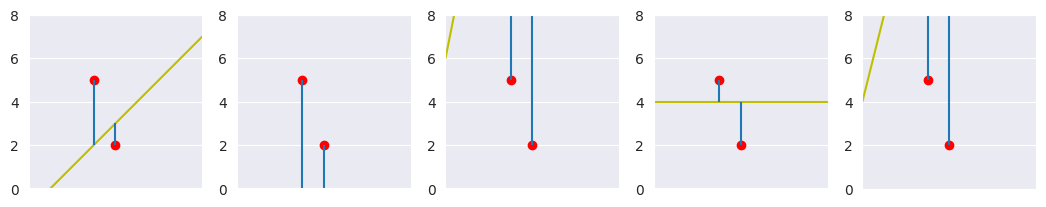

In [207]:
def process(D, model, ax):
    # make some useful abbreviations/names
    # y is our "actual"
    x, y = D[:, 0], D[:, 1]
    m, b = model
    # styling
    axis_helper(ax, (0, 8))
    # plot the data
    ax.plot(x, y, 'ro')
    # plot the prediction line
    helper_xs = np.array([0, 8])
    helper_line = m * helper_xs + b
    ax.plot(helper_xs, helper_line, color='y')
    
    # plot the errors
    predictions = m * x + b
    ax.vlines(x, predictions, y)
    # calculate error amounts
    errors = y - predictions
    sse = np.dot(errors, errors)
    return (errors, errors.sum(), sse, np.sqrt(sse))
    # tuple up the results

D = np.array([
    [3, 5],
    [4, 2]
])

import random

def generate_random_pairs(n, min_value, max_value):
    random_pairs = []
    for _ in range(n):
        x = random.randint(min_value, max_value)
        y = random.randint(min_value, max_value)
        random_pairs.append([x, y])
    return random_pairs

# Example usage:
random_pairs = generate_random_pairs(5, -5, 6)
print(random_pairs)

lines_mb = np.array(
    random_pairs
)
col_labels = ("Raw Errors", "Sum", "SSE", "TotDist")
results = []
# note: plotting occurs in process()
fig, axes = plt.subplots(1, 5, figsize=(13, 5))
records = [process(D, mod, ax) for mod,ax in zip(lines_mb, axes.flat)]
df = pd.DataFrame.from_records(records, columns=col_labels)
display(df)



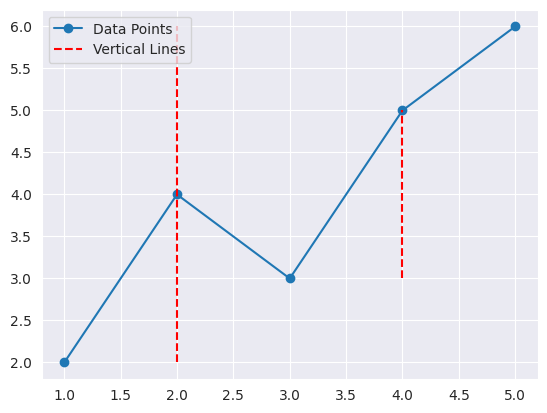

In [125]:
import matplotlib.pyplot as plt

# Create a simple plot
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4, 5], [2, 4, 3, 5, 6], marker='o', linestyle='-', label='Data Points')

# Draw vertical lines

x_values = [2, 4]
ymin_values = [2, 3]
ymax_values = [6, 5]
ax.vlines(x_values, ymin_values, ymax_values, colors='red', linestyle='--', label='Vertical Lines')

plt.legend()
plt.show()
